In [6]:
import sys
import os
sys.path.append(os.path.abspath('../..'))

In [12]:
from src.data_loader import ESGDataLoader

loader = ESGDataLoader(processed_dir="../../data/processed", n_lags=6)
df = loader.load_data(save=False, verbose=False)  

df.head()

,date,ticker,return,year,name,esg,e,s,g,sector,industry,ret_lag_1,ret_lag_2,ret_lag_3,ret_lag_4,ret_lag_5,ret_lag_6
6,2020-08-31,A,0.042458,2020,AGILENT TECHS.,38.06,84.83,55.44,77.37,Healthcare,Diagnostics & Research,0.092365,0.002610,0.149752,0.073095,-0.070715,-0.066497
7,2020-09-30,A,0.005178,2020,AGILENT TECHS.,38.06,84.83,55.44,77.37,Healthcare,Diagnostics & Research,0.042458,0.092365,0.002610,0.149752,0.073095,-0.070715
8,2020-10-31,A,0.011393,2020,AGILENT TECHS.,38.06,84.83,55.44,77.37,Healthcare,Diagnostics & Research,0.005178,0.042458,0.092365,0.002610,0.149752,0.073095
9,2020-11-30,A,0.147133,2020,AGILENT TECHS.,38.06,84.83,55.44,77.37,Healthcare,Diagnostics & Research,0.011393,0.005178,0.042458,0.092365,0.002610,0.149752
10,2020-12-31,A,0.013601,2020,AGILENT TECHS.,38.06,84.83,55.44,77.37,Healthcare,Diagnostics & Research,0.147133,0.011393,0.005178,0.042458,0.092365,0.002610


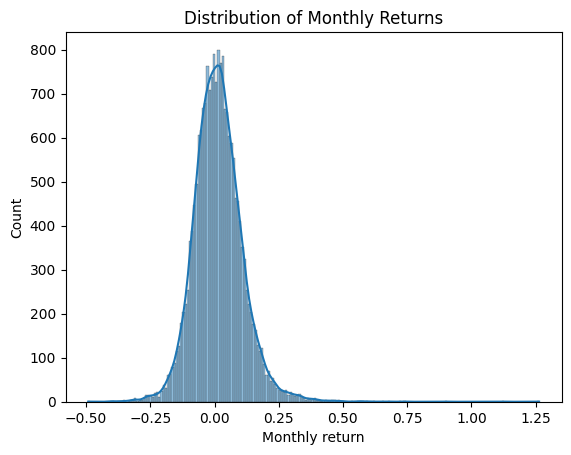

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["return"], kde=True)
plt.title("Distribution of Monthly Returns")
plt.xlabel("Monthly return")
plt.show()



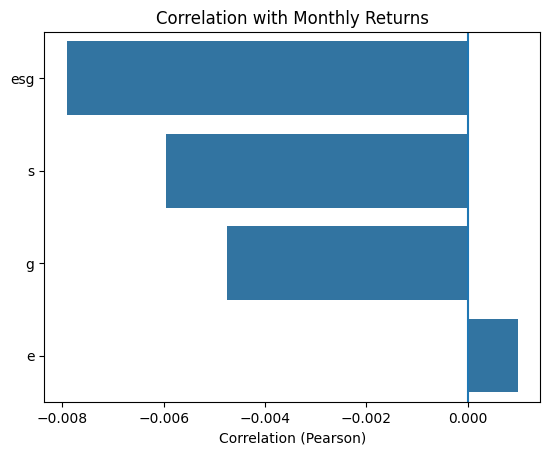

esg   -0.007915
s     -0.005960
g     -0.004761
e      0.000988
dtype: float64

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_with_return = df[["esg", "e", "s", "g"]].corrwith(df["return"])
corr_with_return = corr_with_return.sort_values()

sns.barplot(x=corr_with_return.values, y=corr_with_return.index)
plt.title("Correlation with Monthly Returns")
plt.xlabel("Correlation (Pearson)")
plt.ylabel("")
plt.axvline(0)
plt.show()

corr_with_return


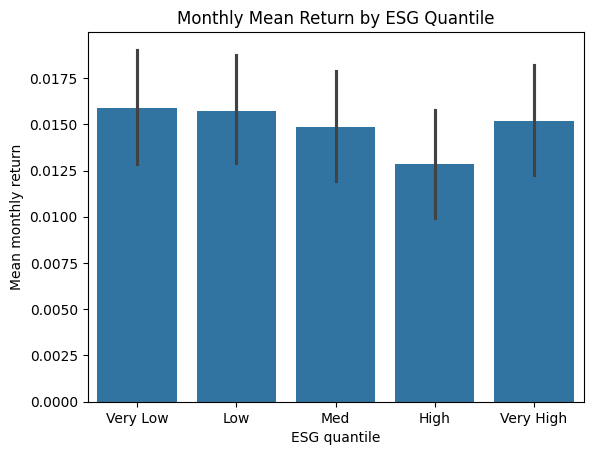

In [18]:
import pandas as pd

df = df.copy()
df["esg_bucket"] = pd.qcut(df["esg"], 5, labels=["Very Low", "Low", "Med", "High", "Very High"])

sns.barplot(data=df, x="esg_bucket", y="return")
plt.title("Monthly Mean Return by ESG Quantile")
plt.xlabel("ESG quantile")
plt.ylabel("Mean monthly return")
plt.show()

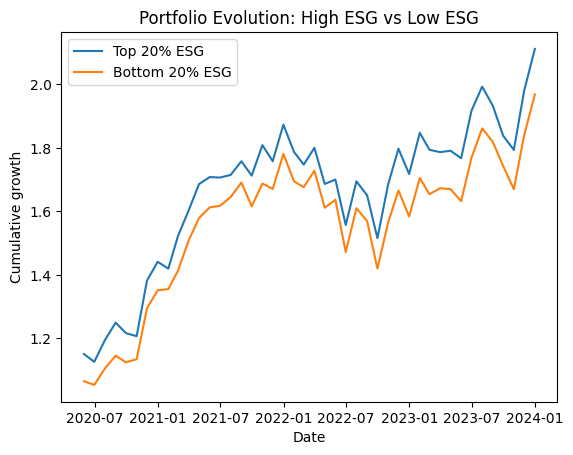

In [13]:
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = df.copy()

# Rank ESG within each month (cross-sectional ranking)
df["esg_rank"] = df.groupby("date")["esg"].rank(pct=True)

high = df[df["esg_rank"] > 0.8].groupby("date")["return"].mean().sort_index()
low  = df[df["esg_rank"] < 0.2].groupby("date")["return"].mean().sort_index()

cum_high = (1 + high).cumprod()
cum_low  = (1 + low).cumprod()

plt.plot(cum_high, label="Top 20% ESG")
plt.plot(cum_low, label="Bottom 20% ESG")
plt.legend()
plt.title("Portfolio Evolution: High ESG vs Low ESG")
plt.xlabel("Date")
plt.ylabel("Cumulative growth")
plt.show()
